In [14]:
from google.colab import files

uploaded = files.upload()

Saving Netflix_titles.csv to Netflix_titles.csv


In [19]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataSet
data = pd.read_csv('Netflix_titles.csv')

#Explore the DataSet
print(data.head())
print(data.info())
print(data.isna().sum())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [28]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [29]:
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['date_added'] = data['date_added'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Unknown')
data['listed_in'] = data['listed_in'].fillna('Unknown')

In [30]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year

In [31]:
# Top 10 countries by number of shows
top_countries = data['country'].value_counts().head(10)
print("\nTop 10 Countries:\n", top_countries)


Top 10 Countries:
 country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [32]:
# Count of shows by genre
genre_count = data['listed_in'].value_counts()
print("\nShows by Genre:\n", genre_count)


Shows by Genre:
 listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64


In [33]:
# Shows added per year
year_count = data['year_added'].value_counts().sort_index()
print(year_count)

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


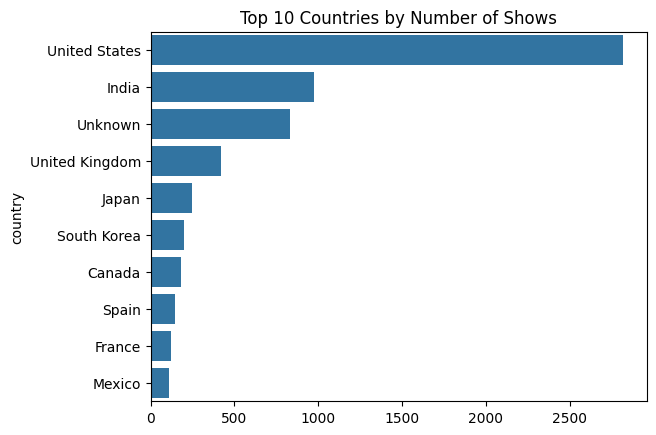

In [34]:
# Top 10 Countries
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Shows')
plt.show()

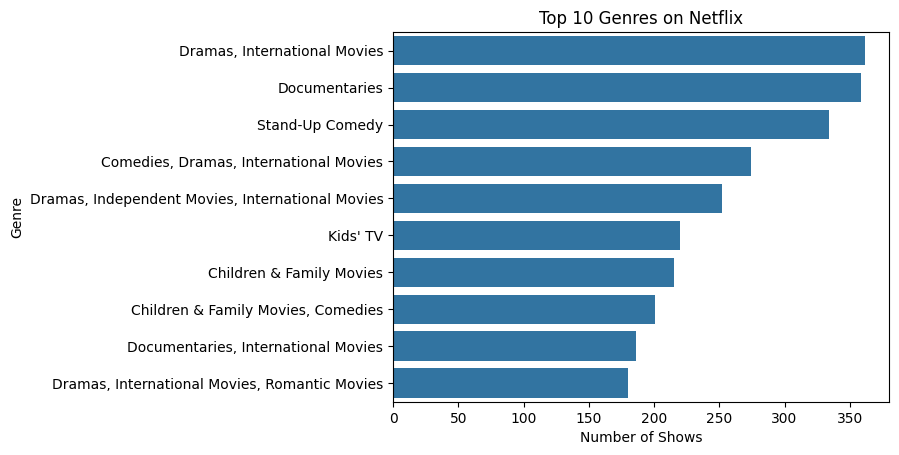

In [40]:
# Genre distribution
top_genres = genre_count.head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')
plt.show()


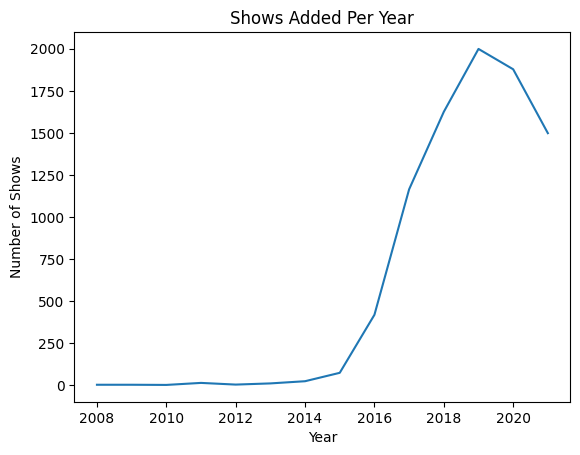

In [39]:
# Show Added Per Year
year_count.plot(kind='line', title='Shows Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.show()

In [41]:
# Convert to EXCEL
data.to_excel('Netflix_Cleaned.xlsx', index=False)

In [42]:
from google.colab import files
files.download('Netflix_Cleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>